This is the cretin main file where I showcase all the functionality. To use this file succesfully you must have added your paths to the paths.py file and you must have cretin installed which is coupled to via the "demo.sh".

In [35]:
from importlib import reload
import numpy as np
import generator_object, to_generator_string, search, paths, write_run_plot, serial_sim_tools, plt_file, premade_gen_files, animate #these python files should be in the same folder as cretin_main
for obj in [generator_object, to_generator_string, search, paths, write_run_plot, serial_sim_tools, plt_file, premade_gen_files, animate]:
    reload(obj)


I'll Introduce the diffrent files .py files and their functionality.

generator_object.py.
Called using generator_object.User_input(), this function is the framework in which we insert the data for our simulations, inside are functions that allow the user to specify the properties of the simulation. Below we will showcase how you create a simulation with sim = generator_object.User_input() and the define f.e the geometry of the simulation using sim.geometry(type = 'slab').

drop_methods_module.py.
For every function inside generator_object.py there is a corresponding dropdown menu you can call to insert the data and help with vieuwing the possible inputs for the functions. 

paths.py.
Provides the locations of the relevant external files (like the cretin executable), and allows for easy changing of these all across the code.

search.py.
In the test folder there are about 50 or so premade generator files, that were created by the writer of cretin. search.py allows one to search through these files for examples of how the code is written. Searching can by done by word, meaning a list will be returned of the most common occurences of this word in the generator file, or by chapter where the most common words in that chapter will be shown. 

plt_file.py.
Cretin outputs matrices when a pltfile is requested, plt_file.py unwraps this data and using matplotlibs functionality to turn it into graphs.

to_generator_string.py.
This turns the sim object produced by generator_object.py intro a generator txt file that cretin can read. 

write_run_plot.py.
Writes the generator file using to_generator_string.py runs cretin with that generator file and plots the resulting data using plt_file.py to an apropriate folder

premade_gen.py.
When the generator files is not being created by the user using the above functinality but instead has been written by hand or is premade, premade_gen.py can be used to run it.

serial_sim_tools
This file adds functionality for running mutiple experment in series and comparing the results. 


In [36]:
# This allows us to find frequently used terms in the generator files, 
# To be specific the lines of text in the generator files get sliced on "word_slicing" and then selected by the input, f.e 'alias'
# Then a histogram gets made of the most common results
# similarly for most used words in a chapter (ie "Radiation", "Geography" etc).
# i'm using this to determine what syntax i should include in this python version

search_for_word = 'alias'

df = search.Generators().word(input = search_for_word, word_slicing = (0,10), print_path = False)
#print(df.to_string())

search_inside_chapter = 'Controls'
#print(search.Generators().chapter(input = search_inside_chapter))


In [37]:
# reproducing detecterz.gen
gen1 = generator_object.User_input()

k1, k2 = 1, 21
l1, l2 = 1, 11
n2 = (k2*l2)/2 
NI, NE, TE = 10**20, 10**20, 10**3
R0, R1, Z0, Z1  = 0. , 1., -5, 5
RD, ZD = R1 + .1, Z1 +.1
MU1 = 10**-3
MU2 = -1 + MU1
PHI1, PHI2, PHI3 = 1.57, .785, .524

gen1.materials_region(nodes = [k1, k2, l1, l2], elec_temp = 1.1)
gen1.materials_region_background(k1, k2, l1, l2, TE)
gen1.geometry(type = 'rz')
gen1.geometry_quad(node_1 = [k1, k2], node_2= [l1, l2], x_cors = [R0, R1], y_cors = [Z0, Z1], ratios = [1,1])
gen1.radiation_ebins(n_boundaries = 50, start = 100, end = 1000)
gen1.radiation_angles(n_rays = 3, n_angles = 15)
gen1.controls(t_start = 0, t_end = 0)
gen1.popular_switches(continuum_transfer='do steady-state continuum transfer', include_degeneracy='include electron degeneracy')

# this automatically creates the 'trial' folder, writes to the 'trial.gen' file, runs cretin, extracts the data and plots it into the trial/images folder 
#write_run_plot.write(name = 'trial1', object = gen1, longprint = False, plot_duplicates = False)
write_run_plot.run(name = 'trial1', object = gen1, longprint = False, plot_duplicates = False)

running cretin with trial1


In [38]:
# if it was unclear what options coninuum_transfer took in the gen1.popular_switches() function you could also call
gen1.drop.popular_switches() # to dropdown the options 
# note that each time you call gen1.drop.popular_switches() you would have to respeciy the options so from a trial and
# error perspective it may be ineffective

In [39]:
# Here we reproduce lasfoam.gen from the test folder

def lasfoam(source):

    gen2 = generator_object.User_input()

    N0, N1 = 1, 21 #number of nodes is 20
    DN, DR = 10, .1
    E1, E2 = 4.68, 4.69
    TE, rho = 2.0, 0.003
    E1, E2 = 4.68, 4.68*1.001
    HPEV = 4.135667516e-15
    mult =  HPEV / (E2 - E1)
    RSPOT = .1
    ELASER, TLASER = 1000, 2e-9
    ILASER = 10**7*ELASER/(TLASER*np.pi*RSPOT**2)
    
    gen2.materials_atom(index = 1, quantum_n_max = 3, element= "h")    
    gen2.materials_atom(index = 1, quantum_n_max = 3, element= "c")

    gen2.materials_region(nodes = [N0, N1], elec_temp = TE)
    gen2.materials_region_rho(rho)
    gen2.materials_region_element(index = 1, initial_ion_population = 1.)
    gen2.materials_region_element(index = 2, initial_ion_population = 1.)

    gen2.geometry(type = 'slab')
    gen2.geometry_nodes(coordinate= "r", scaling_type  = "lin", nodes = [N0, N1], nodes_range=[0,DR])

    gen2.radiation_ebins(n_boundaries = 61, start = 0.1, end = 10**(5))
    gen2.radiation_angles(n_rays = 3)

    gen2.controls(t_start=0., t_end = 3e-9, restart = True)
    gen2.controls_history(id = 1, value_mutiplier = ILASER, time_multiplier = TLASER)
    gen2.controls_history_tv(time = 0., value = 1)
    gen2.controls_history_tv(time = 1.0, value = 1.)
    gen2.controls_history_tv(time = 1.0, value = 0.)

    gen2.parameters(scattering_multiplier = 0,initial_timestep = 10**-13, minimum_timestep = 10**-14, maximum_timestep = 10**-10, time_between_snapshots=10**(-9))
    gen2.popular_switches(temparture_calc_heating_rates=['temp calc = time dependant','heating rates = electronic'], max_iterations_per_timestep=10)

    if source == 'SOURCE1':
        gen2.sources_source_laser(laser_wavelength = 4, option_1= 'rate', option_2= 'history', values = [1,1], nodes= [N0, N1])

    elif source == 'SOURCE2':
        gen2.sources_source_jnu(E_range=[E1,E2], option_1= 'rate', option_2= 'history', values = [1,mult], nodes= [N0, N1])

    elif source == 'SOURCE3':
        gen2.sources_source_jbndry(index = 1, E_range= [E1, E2], option_1= 'rate', option_2= 'history',values = [1,mult])
        gen2.sources_boundary(package='radiation', type = 'streaming', nodes= [1, 0, N1, 'xfile'], value = 1, mult = 1)
        gen2.popular_switches(temparture_calc_heating_rates=['temp calc = time dependant','heating rates = electronic'], 
                              max_iterations_per_timestep = 10, continuum_transfer='do steady-state and use integral formalism formalism')

    elif source == 'SOURCE4':
        gen2.sources_source_jbndry(index = 1, E_range= [E1, E2], option_1= 'rate', option_2= 'history',values = [1,mult])
        gen2.sources_boundary(package='radiation', type = 'streaming', nodes= [1, 0, N1, 'xfile'], value = 1, mult = 1)
        gen2.popular_switches(continuum_transfer_evolves_temp = True)
        gen2.sources_rswitch(radiation_transfer_algorithm1d= 'do transport using integral formalism', assume_NLTE= True)  
    
    return gen2


gen2 = lasfoam('SOURCE4')

name = 'checking_lasfoam4'
#write_run_plot.all(name, object = gen2, longprint=False, plot_duplicates= False)
#write_run_plot.write(name, object = gen2, longprint=False, plot_duplicates= False)
write_run_plot.run(name, object = gen2, longprint=False, plot_duplicates= False)


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/checking_lasfoam4/checking_lasfoam4.gen
running cretin with checking_lasfoam4
ERROR: At line 2392 of file /g/g11/hascott/Cretin/cretin/src/main/extdata.f
Fortran runtime error: Bad unit number in statement



In [40]:
# here we plot mutiple simulations into one plot to compare them
# first we create our generic object
def sim(var):

    gen2 = generator_object.User_input()

    rho, T_ev, Tkelvin = 6.9, 30*var, 512,  
    ne, z = 10**20, 12
    N0, N1 = 1, 41 #We are operating in 1d wih 40 nodes
    tin_n = 50
    DR =  .1

    gen2.materials_atom(index = 1, quantum_n_max = 3, element= "Sn")
    gen2.materials_region(nodes = [N0, N1], elec_temp = T_ev)
    gen2.materials_region_rho(rho)
    gen2.materials_region_background(ion_density = ne, electron_density = ne, average_charge = z, average_charge_squared=z**2, avg_atomic_number = tin_n )
    gen2.materials_region_element(index = 1, initial_ion_population = ne )

    gen2.geometry(type = 'slab')
    gen2.geometry_nodes(coordinate= "r", scaling_type  = "lin", nodes = [N0, N1], nodes_range=[0,DR])

    gen2.radiation_ebins(n_boundaries = 121, start = 10**-5, end = 10**(5))
    gen2.radiation_angles(n_rays = 3)

    gen2.controls(t_start=0., t_end=3*10**-6, restart = True)
    gen2.popular_switches(timestep_between_snapshot = 5)
    return gen2


i0, iend = 0,6
trials = []
name = 'trial'
# Here i showcase the mutiplot functionality automatically putting all the data into one plot per type
for i in range(i0,iend):

    trial = name+str(i)
    trials.append(trial)
    variable = 2**i
    gen2 = sim(variable)
    write_run_plot.write(name = name+str(i), object = gen2)
    write_run_plot.run(name = name+str(i), longprint=False)

#serial_sim_tools.plot_all('trials_mutiplot', trials)



writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/trial0/trial0.gen
running cretin with trial0
ERROR: Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/trial1/trial1.gen
running cretin with trial1
ERROR: Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/trial2/trial2.gen
running cretin with trial2
ERROR: Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/trial3/trial3.gen
running cretin with trial3
ERROR: Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/trial4/trial4.

In [41]:
def sim1(var1, var2, var3):

    gen2 = generator_object.User_input()

    rho, T_ev, Tkelvin = 6.9*var1, 30*var2, 512*var3,  
    ne, z = 10**20, 12
    N0, N1 = 1, 41 #We are operating in 1d wih 40 nodes
    tin_n = 50
    E1, E2 = 4, 4.7 # the laser energies
    DN, DR = 10, .1


    gen2.materials_atom(index = 1, quantum_n_max = 3, element= "Sn")
    gen2.materials_region(nodes = [N0, N1], elec_temp = T_ev)
    gen2.materials_region_rho(rho)
    gen2.materials_region_background(ion_density = ne, electron_density = ne, average_charge = z, average_charge_squared=z**2, avg_atomic_number = tin_n )
    gen2.materials_region_element(index = 1, initial_ion_population = ne )

    gen2.geometry(type = 'slab')
    gen2.geometry_nodes(coordinate= "r", scaling_type  = "lin", nodes = [N0, N1], nodes_range=[0,DR])

    gen2.radiation_ebins(n_boundaries = 121, start = 10**-5, end = 10**(5))
    gen2.radiation_angles(n_rays = 3)

    gen2.controls(t_start=0., t_end=3*10**-6, restart = True)
    gen2.popular_switches(timestep_between_snapshot = 5)
    return gen2

# Here i showcase the combinatorcs functionality allowin the combination of any set of paramters for mutiplot
vars1, vars2, vars3 = np.arange(1, 3), np.arange(4, 6), np.arange(2 ,12 ,5)
arr = np.array([vars1, vars2, vars3], dtype=object)
combinations = serial_sim_tools.combinatorics(arr = arr)
names = []
base_name = 'combinatorics_sim'

for combination in combinations:
    [var1,var2,var3] = combination
    gen2 = sim1(var1, var2, var3)
    name = f'{base_name}_{var1}_{var2}_{var3}'
    names.append(name)
    write_run_plot.write(name = name, object = gen2)
    write_run_plot.run(name = name, longprint=False)

#serial_sim_tools.plot_all(f'{base_name}_multiplot', names)


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/combinatorics_sim_1_4_2/combinatorics_sim_1_4_2.gen
running cretin with combinatorics_sim_1_4_2
ERROR: Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/combinatorics_sim_1_4_7/combinatorics_sim_1_4_7.gen
running cretin with combinatorics_sim_1_4_7
ERROR: Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/combinatorics_sim_1_5_2/combinatorics_sim_1_5_2.gen
running cretin with combinatorics_sim_1_5_2
ERROR: Note: The following floating-point exceptions are signalling: IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/combinatorics_sim_1_5_7/combinatorics_sim_1_5_7.gen
running cretin with combinatorics_si

In [42]:
# premade generator files exist in the test folder, premades allows you to run run and plot with a user defined path.

#premade_gen_files.run('ablate', path = paths.to_previous_experiments())



In [43]:
# Here i showcase the ability to add plots, and grouping together plots into diffrent multiplot files

def tin(source, variable):

    gen2 = generator_object.User_input()

    N0, N1 = 1, 21 #number of nodes is 20
    DR =  .1
    TE, rho = 30.0, .002
    E1, E2 = 4.68, 4.68*1.001
    HPEV = 4.135667516e-15
    mult =  HPEV / (E2 - E1)
    RSPOT = .01
    ELASER, TLASER = .06, 2e-9
    ILASER = variable*10**7*ELASER/(TLASER*np.pi*RSPOT**2)
    
    gen2.materials_atom(index = 1, quantum_n_max = 3, element= "sn")    

    gen2.materials_region(nodes = [N0, N1], elec_temp = TE)
    gen2.materials_region_rho(rho)
    gen2.materials_region_element(index = 1, initial_ion_population = 1.)


    gen2.geometry(type = 'slab')
    gen2.geometry_nodes(coordinate= "r", scaling_type  = "lin", nodes = [N0, N1], nodes_range=[0,DR])

    gen2.radiation_ebins(n_boundaries = 101, start = 0.1, end = 10**(2))
    gen2.radiation_angles(n_rays = 3)

    gen2.controls(t_start=0., t_end = 3e-9, restart = True)
    gen2.controls_history(id = 1, value_mutiplier = ILASER, time_multiplier = TLASER)
    gen2.controls_history_tv(time = 0., value = 1)
    gen2.controls_history_tv(time = 1.0, value = 1.)
    gen2.controls_history_tv(time = 1.0, value = 0.)


    gen2.parameters(scattering_muliplier = 0,initial_timestep = 10**-13, minimum_timestep = 10**-14, maximum_timestep = 10**-9, time_between_snapshots=10**(-9))
    gen2.popular_switches(temparture_calc_heating_rates=['temp calc = time dependant','heating rates = electronic'], max_iterations_per_timestep=20)

    gen2.add_plot(name = 'plotter', xvar = 'time', yvar = 'tiv')
    gen2.add_plot(name = 'plotter1', xvar = 'time', yvar = 'tev')
    gen2.add_plot(name = 'plotter2', xvar = 'time', yvar = 'rho')
    gen2.add_plot(name = 'plotter3', xvar = 'time', yvar = 'tev')
    gen2.add_plot(name = 'plotter4', xvar = 'time', yvar = 'tautot')
    gen2.add_plot(name = 'plotter5', xvar = 'time', yvar = 'zbar')
    gen2.add_plot(name = 'plotter6', xvar = 'time', yvar = 'nion')
    gen2.add_plot(name = 'plotter7', xvar = 'time', yvar = 'ne')

    if source == 'SOURCE1':
        gen2.sources_source_laser(laser_wavelength = 4, option_1= 'rate', option_2= 'history', values = [1,1], nodes= [N0, N1])

    elif source == 'SOURCE2':
        gen2.sources_source_jnu(E_range=[E1,E2], option_1= 'rate', option_2= 'history', values = [1,mult], nodes= [N0, N1])

    elif source == 'SOURCE3':
        gen2.sources_source_jbndry(index = 1, E_range= [E1, E2], option_1= 'rate', option_2= 'history',values = [1,mult])
        gen2.sources_boundary(package='radiation', type = 'streaming', nodes= [1, 0, N1, 'xfile'], value = 1, mult = mult)
        gen2.popular_switches(temparture_calc_heating_rates=['temp calc = time dependant','heating rates = electronic'], 
                              max_iterations_per_timestep = 10, continuum_transfer='do steady-state and use integral formalism formalism')

    elif source == 'SOURCE4':
        gen2.sources_source_jbndry(index = 1, E_range= [E1, E2], option_1= 'rate', option_2= 'history',values = [1,mult])
        gen2.sources_boundary(package='radiation', type = 'streaming', nodes= [1, 0, N1, 'xfile'], value = 1, mult = mult)
        gen2.popular_switches(continuum_transfer_evolves_temp = True)
        gen2.sources_rswitch(radiation_transfer_algorithm1d= 'do transport using integral formalism', assume_NLTE= True)  
    
    return gen2

i0 = 1
trials = []
name = 'trial'
N, M = 3, 3 # this is the multiplot group size and number of groups
iend = i0+M*N

for i in range(i0,iend):
    name_i = name+str(i)
    trials.append(name_i)
    gen2 = tin('SOURCE1', i)

    write_run_plot.write(name = name_i, object = gen2)
    write_run_plot.run(name = name_i, longprint=False)

    if (i>0 and i%N == 0) or i == iend -1:
        #serial_sim_tools.plot_all(f'trials_mutiplot{int(i/N)}', trials)
        trials = []



TypeError: parameters() got an unexpected keyword argument 'scattering_muliplier'

In [ ]:

# the premade files also include plt.file data arrays, which contain the data that this frontend uses to make the plots.
# If you want to acces these Plt files without creating a generator file or running cretin you can use plt_file.py

plt_file.create_plot('advect', path = paths.to_previous_experiments())



removed existing image folder
Created image folder at /home/brewster/Desktop/cretin_package-master/Premade_cretin_tests/advect/images


In [ ]:
def sim(var1):

    gen = generator_object.User_input()
    n_atom = 50
    rho, T_ev = 6.9, var1/11600
    z = 11
    N0, N1 = 1, 501 #We are operating in 1d wih 40 nodes
    Rmin, Rmax = 0, 0.01
    p2 = 1.e-9


    gen.materials_atom(index = 1, quantum_n_max = var3, element= "sn")  
    gen.materials_region(nodes = [N0, N1], elec_temp = T_ev, qstart=True) 

    gen.materials_region_material(rho, n_atom, z, z**2) #

    gen.geometry(type = 'slab')
    gen.geometry_nodes(coordinate = "r", scaling_type  = "geom", nodes = [N0, N1], nodes_range = [Rmin, Rmax], drmin = 1.e-6, slope = -1)


    gen.sources_laser(index = 1, laser_wavelength = 1, option_1= 'value', option_2= 'history', id_value = 1, multiplier=1,)
    gen.sources_lasray(entrance_position =  10, entrance_direction_mu = 1, entrance_direction_phi = 0, fractional_power= 1, res_frac=.5)
    
    gen.sources_history(id = 1, value_multiplier = 1e18, time_multiplier = 1., pulse_type='gaussian', p1 = 5*p2, p2 = p2)

    gen.popular_switches(timestep_between_snapshot = 100, 
                        temparture_calc_heating_rates = ['temp calc = time dependant', 'heating rates = electronic'], 
                        raytrace = True, 
                        include_degeneracy = 'no degeneracy',
                        continuum_transfer_evolves_temp = True)

        
    gen.other_switches(resonant_absrption_fraction = 'constant value for each ray from lasray', 
                        subcycle_maximum = 1000,
                        do_kinetics_zone_centerd = True, 
                        population_calculation = 'time dependent diffusion', 
                        control_calc_thermal_conduct = 'include thermal conduction')
    
    gen.controls(t_start = 0, t_end = 3.e-7, restart = True)

    gen.parameters(time_between_snapshots = 1e-9, initial_timestep = 1.e-14)
    
    return gen

var1_ops = [500., 600., 700, 800.]

sims = []


for entry in var1_ops:
    name = f'simrun_{entry}'
    sims.append(name)
    gen = sim(entry)

    write_run_plot.write(name, object = gen)
    write_run_plot.run(name, longprint = False)

#serial_sim_tools.plot_all('sims_multiplot', sims, dpi = 500)



writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/simrun_500.0/simrun_500.0.gen
running cretin with simrun_500.0

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/simrun_600.0/simrun_600.0.gen
running cretin with simrun_600.0

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/simrun_700/simrun_700.gen
running cretin with simrun_700

writing to /home/brewster/Desktop/cretin_package-master/Personal_experiments/simrun_800.0/simrun_800.0.gen
running cretin with simrun_800.0
multiplot to /home/brewster/Desktop/cretin_package-master/Personal_experiments/sims_multiplot


animation saved at /home/brewster/Desktop/cretin_package-master/Personal_experiments/sims_multiplot


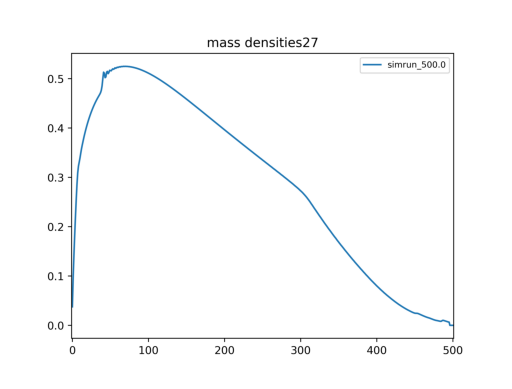

In [ ]:
# note the amount of timesteps added above using the gen.parameters(time_between_snapshots = 1e-9) command located at the multiplot location.
# all these snapshots can be turned into an animation using 
reload(animate)

images_name = 'mass densities'
dir = paths.to_personal_data()+'sims_multiplot'
animate.ex(image_dir = dir,images_name = images_name)


In [ ]:
# If you would like to have a look at the raw data produced by the dump file

foldername= 'simrun_500.0'
loc = f'{paths.to_personal_data()}{foldername}/{foldername}.d00'
data = serial_sim_tools.savedict(loc)


ntimes 28
time_0 0.0
time_1 1.1362825732319053e-09
time_10 8.319445067665268e-09
time_11 9.334416070923466e-09
time_12 1.0424100289915084e-08
time_13 1.1699764731437962e-08
time_14 1.2988917291920518e-08
time_15 1.4441421364925622e-08
time_16 1.559400120268955e-08
time_17 1.732287095933544e-08
time_18 1.991617559430428e-08
time_19 2.3806132546757535e-08
time_2 2.143093709116856e-09
time_20 2.964106797543742e-08
time_21 3.8393471118457246e-08
time_22 5.152207583298699e-08
time_23 7.12149829047816e-08
time_24 1.007543435124735e-07
time_25 1.4506338442401138e-07
time_26 2.115269457913182e-07
time_27 3.112222878422784e-07
time_3 3.202400957406235e-09
time_4 4.211264649379562e-09
time_5 4.830014277608688e-09
time_6 5.213938933885993e-09
time_7 6.235106444899324e-09
time_8 6.38710760560244e-09
time_9 7.249245397084417e-09
times [0.00000000e+00 1.13628257e-09 2.14309371e-09 3.20240096e-09
 4.21126465e-09 4.83001428e-09 5.21393893e-09 6.23510644e-09
 6.38710761e-09 7.24924540e-09 8.31944507e-0